## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading dataset

In [2]:
data = pd.read_csv("Salary Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Exploratory data analysis (EDA)

In [4]:
data.shape

(30, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


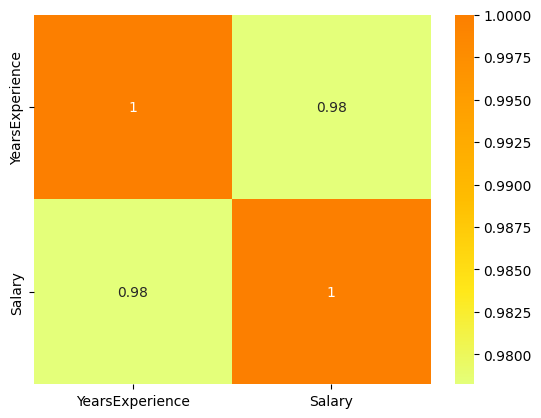

In [7]:
corr = data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

### It shows salary column and years experience column are highly correlated to each other

## Splitting data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y = data['Salary']

In [25]:
x = data.drop(columns = 'Salary', axis = 1)


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

### Model building

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

### Plot data ( ploting model predicted value)

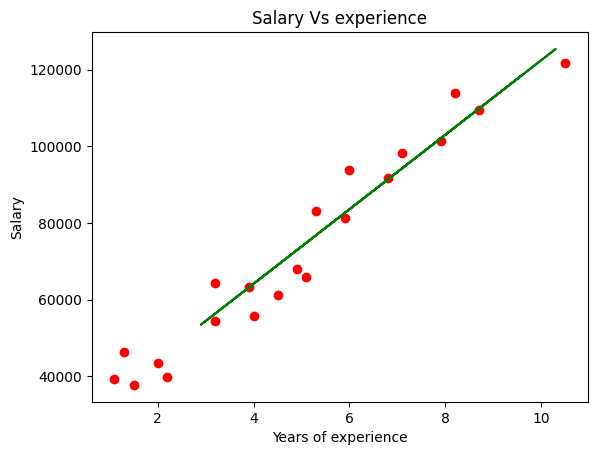

In [40]:
plt.scatter(x_train, y_train,color='red') 
plt.plot(x_test, y_pred,color='green') 
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Salary Vs experience');
plt.show()

### ploting actual and predictied values

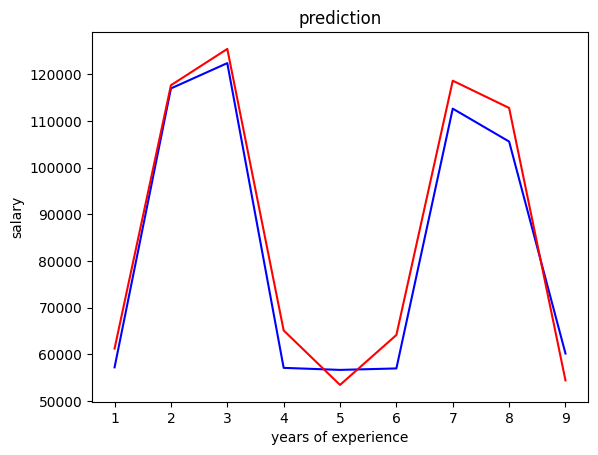

In [58]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test,color='blue')
plt.plot(c,y_pred,color = 'red')
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.title("prediction")
plt.show()

## calculating accuracy of model and plotting error

In [41]:
from sklearn.metrics import r2_score ,mean_squared_error
#In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions 
# approximate the real data points. 
#An R2 of 1 indicates that the regression predictions perfectly fit the data.

In [42]:
r2_train = r2_score(y_pred,y_test)*100

In [43]:
r2_train

96.55911330936917

#### It shows our model is predicting 96.55% correctly

In [44]:
mse = mean_squared_error(y_pred,y_test)

In [45]:
mse

30310299.043402553

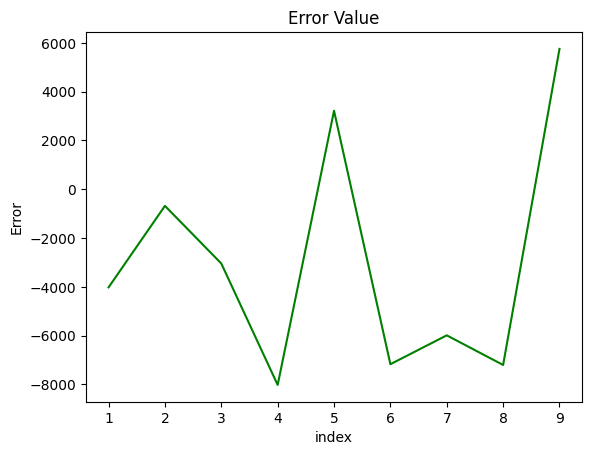

In [49]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

## Intercept and coefficient of line

In [48]:
# Intecept and coeff of the line
print('Intercept of the model:',model.intercept_)
print('Coefficient of the line:',model.coef_)



Intercept of the model: 25202.88778615486
Coefficient of the line: [9731.20383825]




Then it is said to form a line with
y = 25202.8 + 9731.2x